In [2]:
%matplotlib inline

import json
import os
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_intensity_stats(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    # Convert the data into a pandas DataFrame
    df = pd.DataFrame.from_dict(data, orient='index')
    df.index = df.index.astype(int)
    df = df.sort_index()
    return df

def create_scatter_plot(df_raw, df_filtered, output_dir, metric='median'):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=metric, y=metric, data=df_raw, label='Raw', color='blue')
    sns.scatterplot(x=metric, y=metric, data=df_filtered, label='Filtered', color='red')
    plt.plot([df_raw[metric].min(), df_raw[metric].max()], 
             [df_raw[metric].min(), df_raw[metric].max()], 'k--', label='y = x')
    plt.xlabel(f'{metric} Intensity (Raw)')
    plt.ylabel(f'{metric} Intensity (Filtered)')
    plt.title('Scatter Plot with Diagonal Reference Line')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'scatter_plot_diagonal.png'))
    plt.show()
    print('Scatter plot with diagonal reference line saved.')

def create_percentage_change_plot(df_raw, df_filtered, output_dir):
    # Ensure both DataFrames have the same labels
    common_labels = df_raw.index.intersection(df_filtered.index)
    df_raw = df_raw.loc[common_labels]
    df_filtered = df_filtered.loc[common_labels]
    
    percentage_change = ((df_filtered['median'] - df_raw['median']) / df_raw['median']) * 100
    plt.figure(figsize=(10, 6))
    plt.bar(common_labels, percentage_change)
    plt.xlabel('Labels')
    plt.ylabel('Percentage Change in Median Intensity')
    plt.title('Percentage Change Plot')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'percentage_change_plot.png'))
    plt.show()
    print('Percentage change plot saved.')
    
def create_absolute_change_plot(df_raw, df_filtered, output_dir):
    # Ensure both DataFrames have the same labels
    common_labels = df_raw.index.intersection(df_filtered.index)
    df_raw = df_raw.loc[common_labels]
    df_filtered = df_filtered.loc[common_labels]

    absolute_change = df_filtered['median'] - df_raw['median']
    labels = common_labels

    plt.figure(figsize=(10, 6))
    plt.bar(labels, absolute_change)
    plt.xlabel('Labels')
    plt.ylabel('Absolute Change in Median Intensity')
    plt.title('Absolute Change Plot')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'absolute_change_plot.png'))
    plt.show()
    print('Absolute change plot saved.')

def create_rank_ordered_plot(df_raw, df_filtered, output_dir):
    df_combined = pd.DataFrame({
        'Label': df_raw.index,
        'Median_Raw': df_raw['median'],
        'Median_Filtered': df_filtered['median']
    })
    df_combined['Difference'] = df_combined['Median_Filtered'] - df_combined['Median_Raw']
    df_combined = df_combined.sort_values('Difference').reset_index(drop=True)
    
    plt.figure(figsize=(10, 6))
    plt.plot(df_combined.index, df_combined['Median_Raw'], label='Raw', marker='o')
    plt.plot(df_combined.index, df_combined['Median_Filtered'], label='Filtered', marker='o')
    plt.xlabel('Ranked Labels')
    plt.ylabel('Median Intensity')
    plt.title('Rank-Ordered Plot')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'rank_ordered_plot.png'))
    plt.show()
    print('Rank-ordered plot saved.')

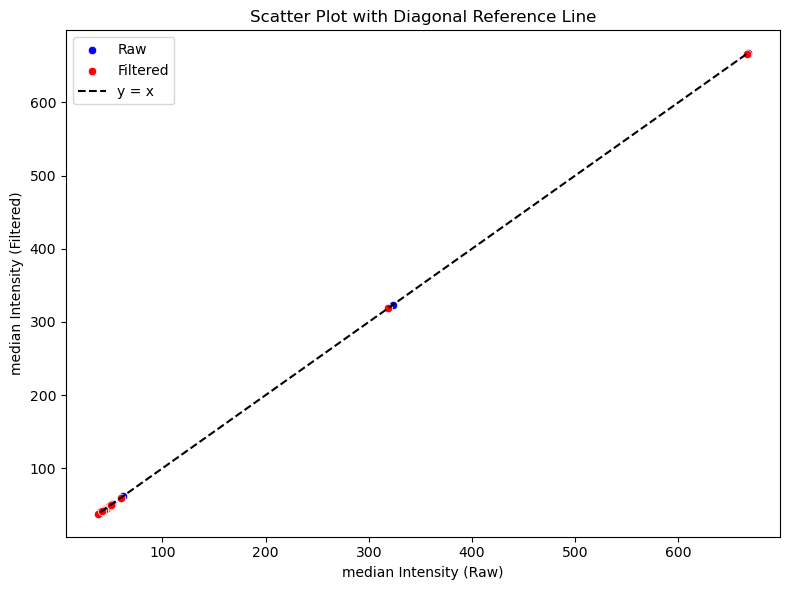

Scatter plot with diagonal reference line saved.


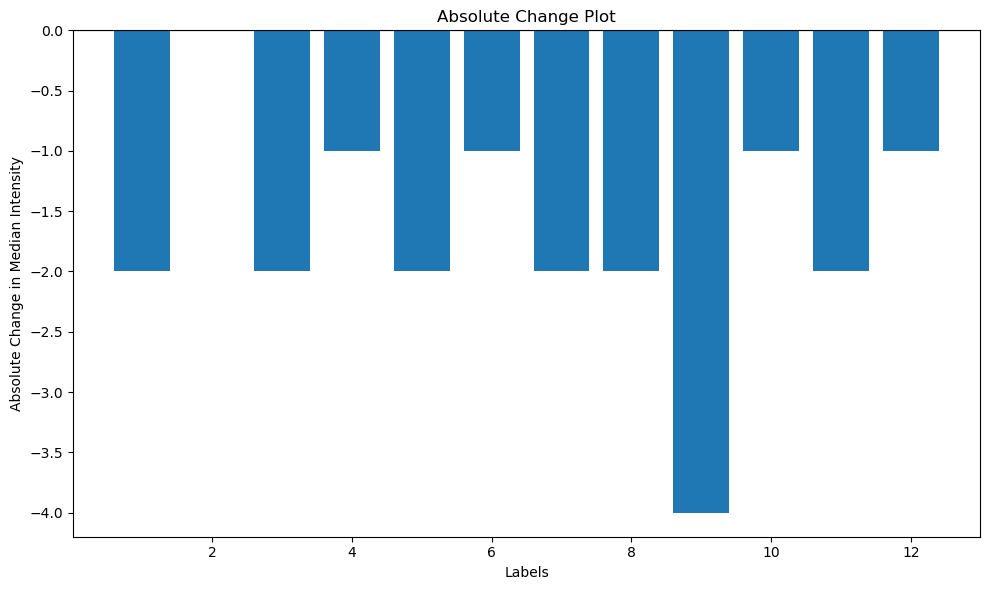

Absolute change plot saved.


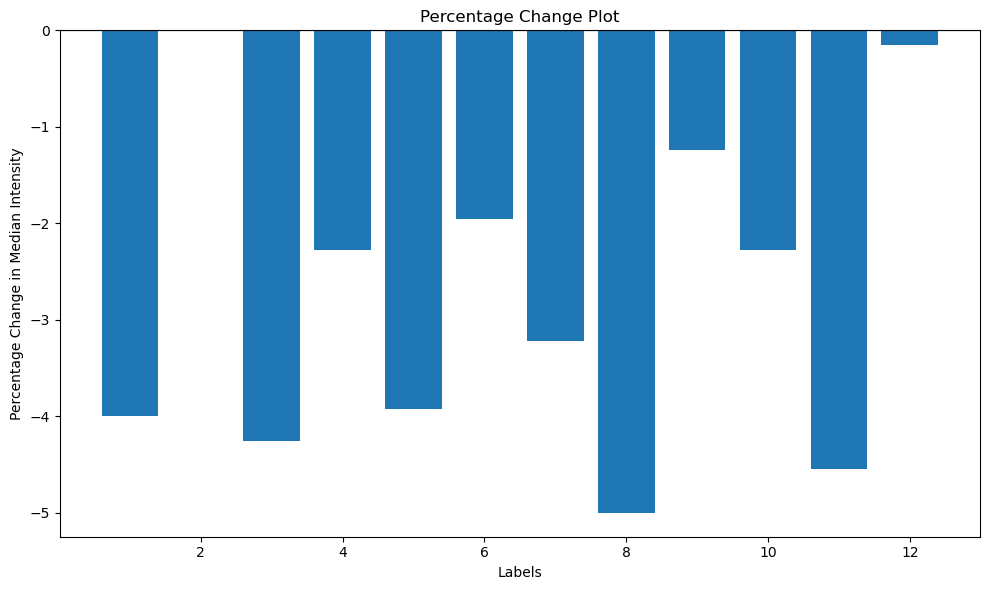

Percentage change plot saved.


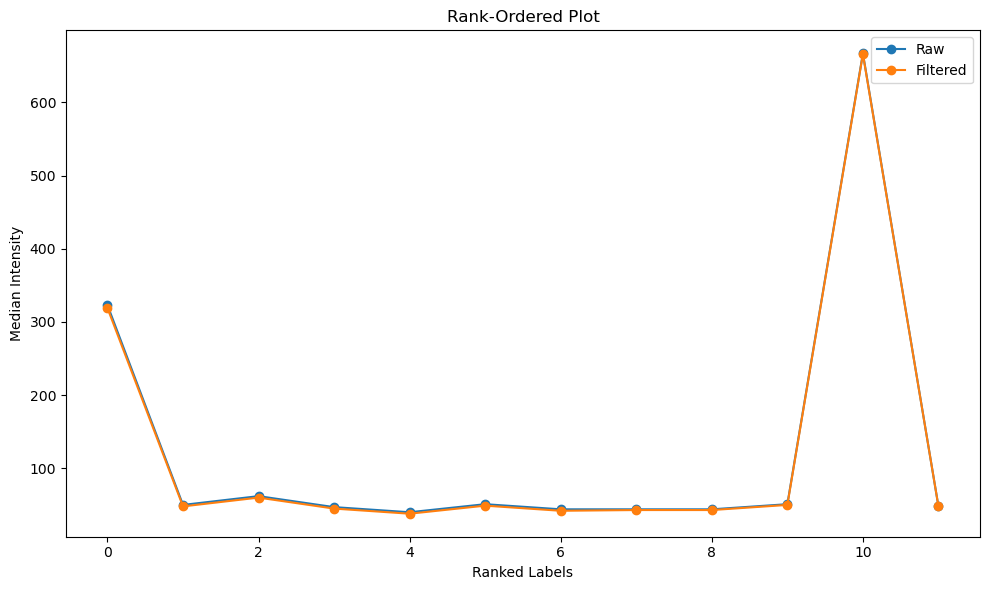

Rank-ordered plot saved.


In [4]:
raw_stats_path = "/root/capsule/data/signal_analysis_raw/block_002_intensity_stats.json"
filtered_stats_path = "/root/capsule/data/signal_analysis_tv_chambolle/block_002_2_intensity_stats.json"
output_dir = "/results/plots"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the intensity statistics
df_raw = load_intensity_stats(raw_stats_path)
df_filtered = load_intensity_stats(filtered_stats_path)

# Create plots
create_scatter_plot(df_raw, df_filtered, output_dir)
create_absolute_change_plot(df_raw, df_filtered, output_dir)
create_percentage_change_plot(df_raw, df_filtered, output_dir)
create_rank_ordered_plot(df_raw, df_filtered, output_dir)